

*   Nama : Astri Widyastiti
*   email : astriwidyastiti@gmail.com
*   idDicoding : astriwidyastiti





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sp
import itertools
import zipfile,os
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
#unrar
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('/content/drive/MyDrive/flowers.rar').extractall('/content')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 1.4 MB/s eta 0:00:00


In [3]:
import os
folder_path = (r'/content/flowers/daisy')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [4]:
import os
folder_path = (r'/content/flowers/dandelion')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [5]:
import os
folder_path = (r'/content/flowers/lily')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [6]:
import os
folder_path = (r'/content/flowers/orchid')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [7]:
import os
folder_path = (r'/content/flowers/rose')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [8]:
import os
folder_path = (r'/content/flowers/sunflower')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [9]:
import os
folder_path = (r'/content/flowers/tulip')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [10]:
#cek label
from pathlib import Path
image_dir = Path('/content/flowers/')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [11]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(3)

Filepath   Label
0  /content/flowers/lily/1021306734_c8df21c7f0_o.jpg    lily
1  /content/flowers/tulip/3558007957_198fb68d94_h...   tulip
2  /content/flowers/orchid/3356522420_0d4f09e41c_...  orchid

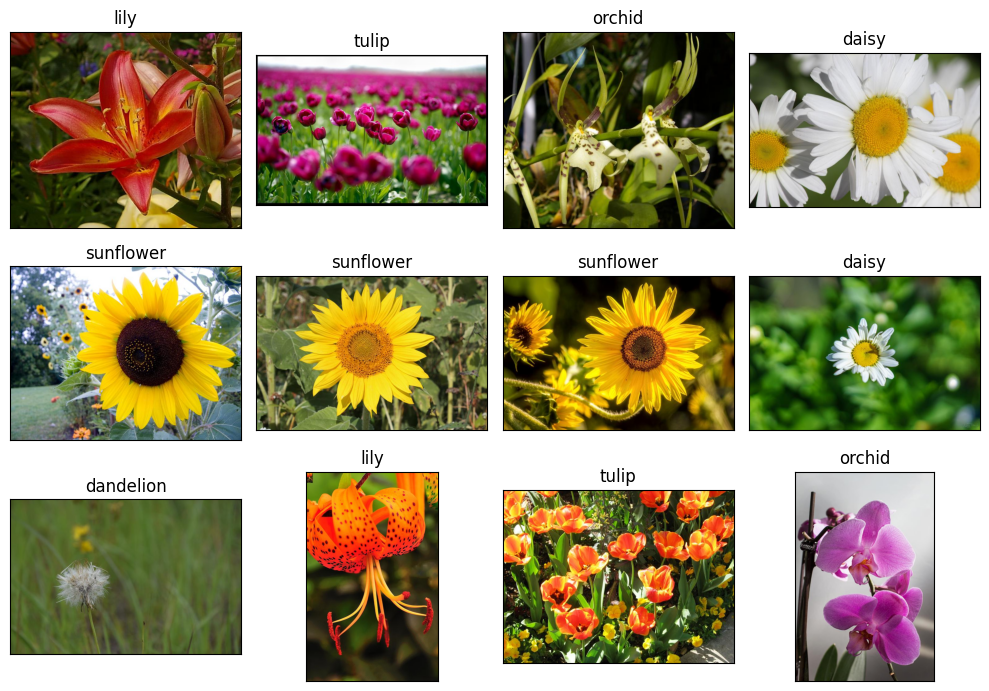

In [12]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

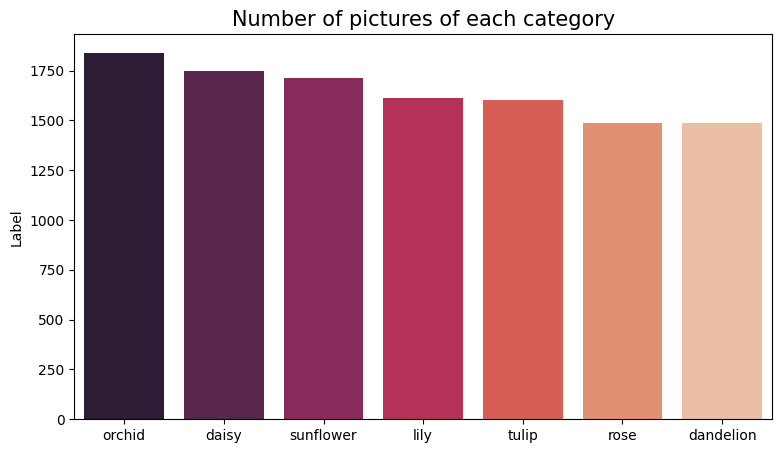

In [13]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [14]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [31]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(150,100),
                                         batch_size=32,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

test_data = val_datagen.flow_from_dataframe(dataframe=test_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(150,100),
                                         batch_size=32,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 9195 validated image filenames belonging to 7 classes.
Found 2299 validated image filenames belonging to 7 classes.


In [32]:

def createModel():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu', input_shape=(150,100,3)))
    model.add(Dropout(0,2))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
    model.add(Dropout(0,2))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
    model.add(Dropout(0,2))
    model.add(MaxPooling2D(pool_size=(2,2)))



    model.add(Conv2D(48, kernel_size=3, padding='same', activation='relu'))
    model.add(Dropout(0,2))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7, activation='softmax'))
    return model

In [33]:
model_cnn = createModel()
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 150, 100, 16)      448       
                                                                 
 dropout_14 (Dropout)        (None, 150, 100, 16)      0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 75, 50, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 75, 50, 16)        2320      
                                                                 
 dropout_15 (Dropout)        (None, 75, 50, 16)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 37, 25, 16)        0         
 ng2D)                                                

In [35]:
#Callback untuk mencegah overfitting dengan menghentikan training, apabila telah terpenuhi
import tensorflow as tf
class reduceOverfitting(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95 ):
      print("\nStopped! Akurasi training dan validasi sudah mencapai 95% dan 95%")
      self.model.stop_training = True
stop = reduceOverfitting()

In [37]:
history = model_cnn.fit(train_data,
          epochs=100, batch_size=32,
          validation_data=test_data,
          validation_steps=5,
          verbose=2,callbacks=[stop])

Epoch 1/100
288/288 - 165s - loss: 1.1413 - accuracy: 0.5717 - val_loss: 0.7716 - val_accuracy: 0.7625 - 165s/epoch - 571ms/step
Epoch 2/100
288/288 - 163s - loss: 0.7795 - accuracy: 0.7363 - val_loss: 0.6481 - val_accuracy: 0.7812 - 163s/epoch - 567ms/step
Epoch 3/100
288/288 - 159s - loss: 0.6862 - accuracy: 0.7616 - val_loss: 0.5702 - val_accuracy: 0.8062 - 159s/epoch - 550ms/step
Epoch 4/100
288/288 - 161s - loss: 0.6378 - accuracy: 0.7817 - val_loss: 0.5174 - val_accuracy: 0.8313 - 161s/epoch - 558ms/step
Epoch 5/100
288/288 - 164s - loss: 0.5913 - accuracy: 0.7976 - val_loss: 0.5039 - val_accuracy: 0.8313 - 164s/epoch - 569ms/step
Epoch 6/100
288/288 - 161s - loss: 0.5369 - accuracy: 0.8160 - val_loss: 0.4807 - val_accuracy: 0.8375 - 161s/epoch - 560ms/step
Epoch 7/100
288/288 - 160s - loss: 0.5203 - accuracy: 0.8270 - val_loss: 0.4578 - val_accuracy: 0.8250 - 160s/epoch - 555ms/step
Epoch 8/100
288/288 - 162s - loss: 0.4885 - accuracy: 0.8356 - val_loss: 0.4647 - val_accuracy: 0

In [38]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

<ipython-input-38-d14c9c73262d>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


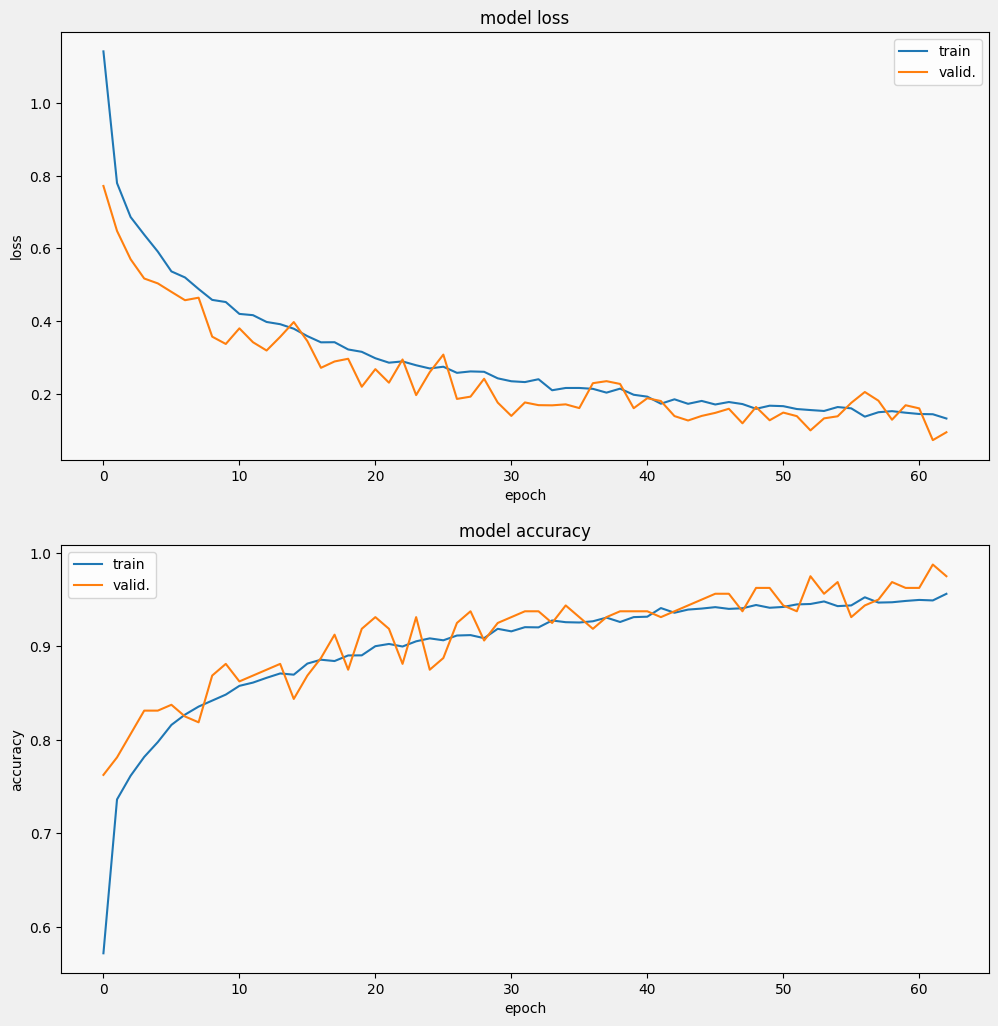

In [39]:
#display
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss', 211)
display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'accuracy', 212)

In [40]:
# Predict the label of the test_images
import numpy as np
pred = model_cnn.predict(test_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

72/72 [==============================] - 27s 369ms/step
The first 5 predictions: ['tulip', 'orchid', 'tulip', 'tulip', 'sunflower']


In [41]:
from sklearn.metrics import classification_report
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       daisy       0.99      0.92      0.95       319
   dandelion       0.99      0.97      0.98       308
        lily       0.93      0.95      0.94       295
      orchid       0.90      0.93      0.91       385
        rose       0.97      0.83      0.89       291
   sunflower       0.92      1.00      0.96       366
       tulip       0.88      0.94      0.91       335

    accuracy                           0.94      2299
   macro avg       0.94      0.93      0.94      2299
weighted avg       0.94      0.94      0.94      2299



In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Test Accuracy = 0.94


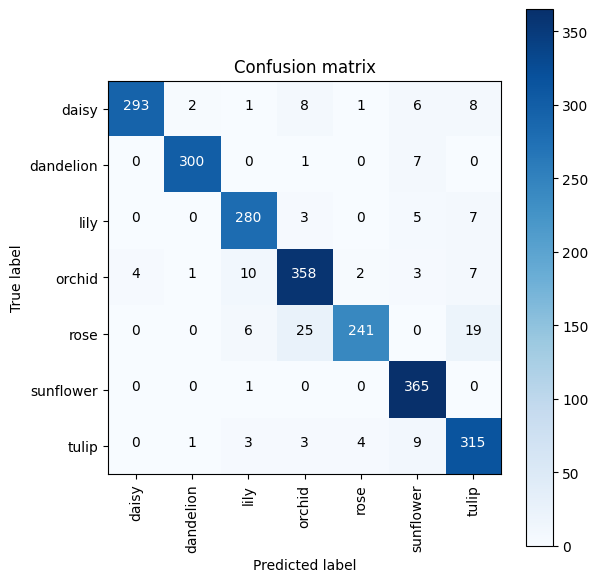

In [43]:
import itertools
from itertools import chain
from sklearn.metrics import accuracy_score, confusion_matrix

for x_model in [{'name':'EfficientNetB7','history':history,'model':model_cnn},]:
    # validate on val set
    accuracy = accuracy_score(y_test, pred)
    print('Test Accuracy = %.2f' % accuracy)

    confusion_mtx = confusion_matrix(y_test, pred)
    cm = plot_confusion_matrix(confusion_mtx, classes = sorted(set(y_test)), normalize=False)

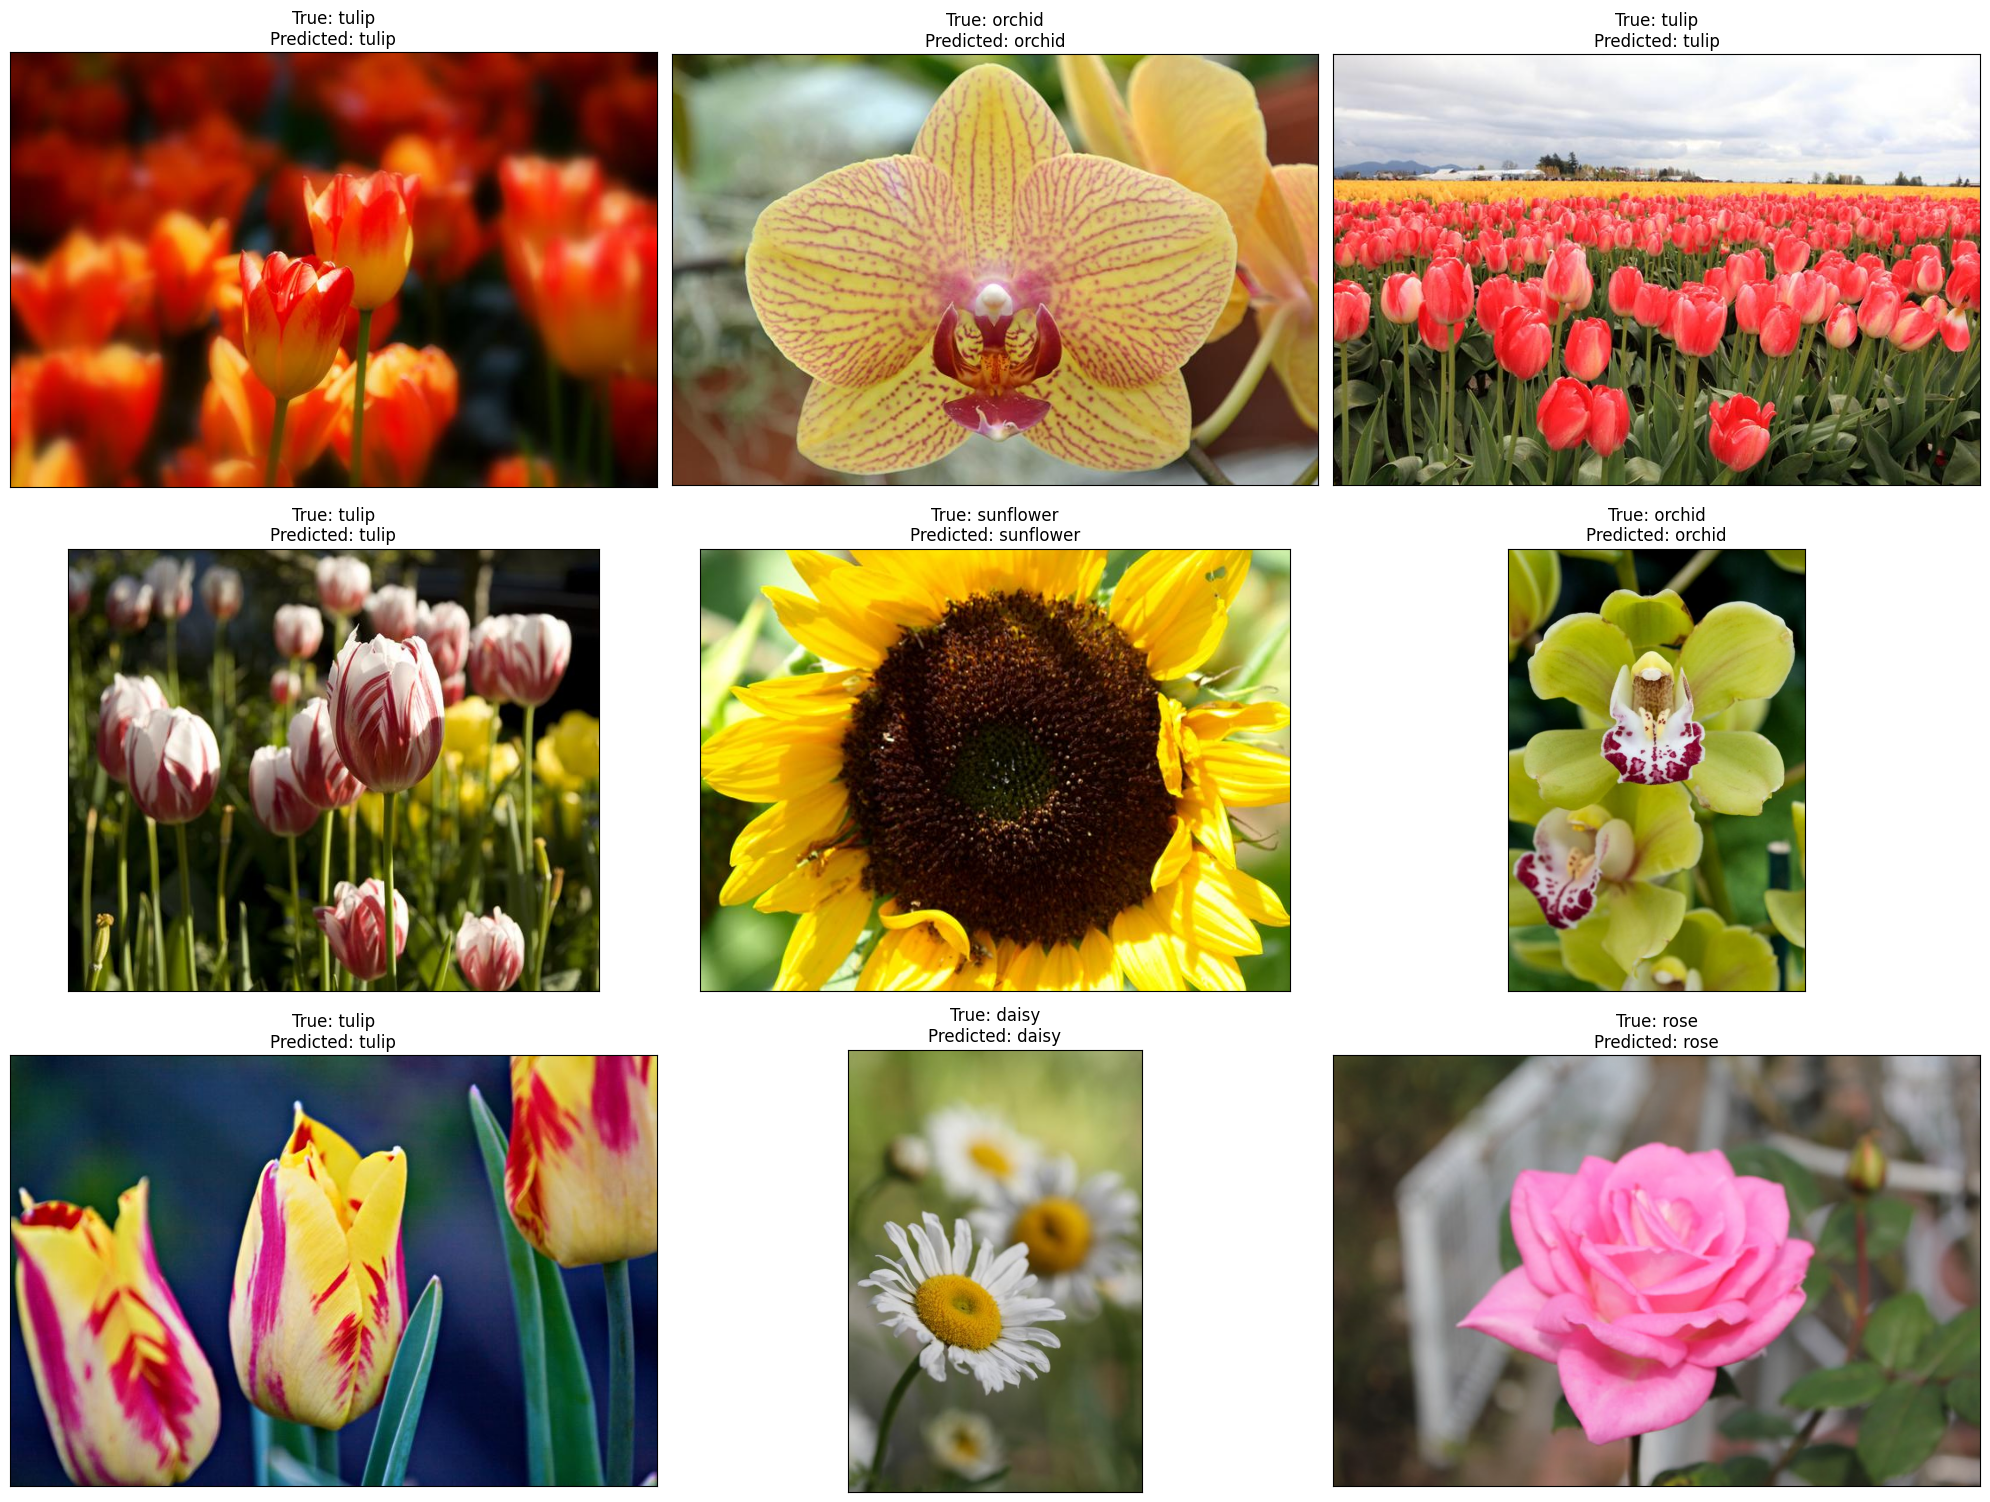

In [44]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

Saving 11733537_83f0d76328_k.jpg to 11733537_83f0d76328_k.jpg
1/1 [==============================] - 0s 121ms/step
11733537_83f0d76328_k.jpg
orchid


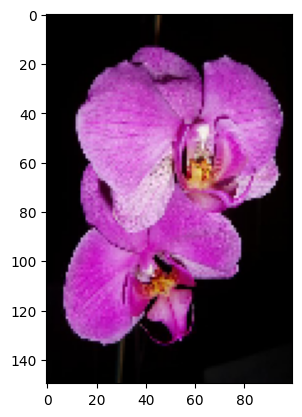

In [46]:

import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,100))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model_cnn.predict(images, batch_size=32)
  print(fn)
  if classes[0,0] == 1.0:
    print('daisy')
  elif classes[0,1] == 1.0:
    print('dandelion')
  elif classes[0,2] == 1.0:
    print('lily')
  elif classes[0,3] == 1.0:
    print('orchid')
  elif classes[0,4] == 1.0:
    print('rose')
  elif classes[0,5] == 1.0:
    print('sunflower')
  else:
    print('tulip')

In [50]:
import tensorflow as tf

# Ganti 'model' dengan model Anda
model = model_cnn

# Konversi model ke format TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TF-Lite ke file lokal
tflite_model_path = '/content/model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print('Model TF-Lite berhasil disimpan di Google Colab!')

Model TF-Lite berhasil disimpan di Google Colab!
